## Data Collection and Pre-Processing

Please note the datascraping code below is an example for only one source. See report for more information. 

In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import csv

# Function to scrape maximum daily temperatures for a given date
def scrape_max_temperatures(date):
    url = f"https://open-meteo.com/history?latitude=0&longitude=0&date={date.strftime('%Y-%m-%d')}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    # Find the maximum temperature element
    max_temp_element = soup.find('div', class_='weather__day__temperature-max')
    if max_temp_element:
        max_temp = max_temp_element.text.strip()
        return max_temp
    else:
        return None

# Start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 31)

# Open CSV file for writing
with open('open-meteo.csv', 'w', newline='') as csvfile:
    fieldnames = ['Date', 'Max Temperature (°C)']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    # Loop through each date and scrape the maximum temperature
    current_date = start_date
    while current_date <= end_date:
        max_temp = scrape_max_temperatures(current_date)
        if max_temp:
            writer.writerow({'Date': current_date.strftime('%Y-%m-%d'), 'Max Temperature (°C)': max_temp})
        else:
            writer.writerow({'Date': current_date.strftime('%Y-%m-%d'), 'Max Temperature (°C)': 'N/A'})
        current_date += timedelta(days=1)


In [ ]:
import pandas as pd

# Load in data
Miami_openmeteo = pd.read_csv('open metro/Miami_daily_daily_weather_data.csv')
Austin_openmeteo = pd.read_csv('open metro/Austin_daily_daily_weather_data.csv')
NYC_openmeteo = pd.read_csv('open metro/NYC_daily_daily_weather_data.csv')
Chicago_openmeteo = pd.read_csv('open metro/Chicago_daily_daily_weather_data.csv')

# Function to process dataframe
def process(df):
    # Convert 'Datetime' to datetime objects
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    # Extract just the date part and format it as "year-month-date"
    df['Date'] = df['Datetime'].dt.strftime('%Y-%d-%m')
    # Optionally, remove the original 'Datetime' column
    df.drop('Datetime', axis=1, inplace=True)
    # Rename 'temperature_2m_max' to 'maxtemp_openmeteo'
    df.rename(columns={'temperature_2m_max': 'maxtemp_openmeteo'}, inplace=True)
    # Create a new DataFrame with selected columns
    return df[['Date', 'maxtemp_openmeteo']]

# Apply the function
Miami_openmeteo = process(Miami_openmeteo)
Austin_openmeteo = process(Austin_openmeteo)
NYC_openmeteo = process(NYC_openmeteo)
Chicago_openmeteo = process(Chicago_openmeteo)

In [ ]:
# Load in data
Miami_vc = pd.read_csv('VC/Miami 2022-01-01 to 2023-12-31.csv')
Austin_vc = pd.read_csv('VC/Austin 2022-01-01 to 2023-12-31.csv')
NYC_vc = pd.read_csv('VC/New york city 2022-01-01 to 2023-12-31.csv')
Chicago_vc = pd.read_csv('VC/Chicago 2022-01-01 to 2023-12-31.csv')

# Function to process dataframe
def process(df):
    # Rename columns
    df = df.rename(columns={'datetime': 'Date', 'tempmax': 'maxtemp_vc'})
    # Convert the 'Date' column to the desired format
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%d-%m')
    # Select only the required columns
    new_df = df[['Date', 'maxtemp_vc']]
    return new_df

# Apply the function
Miami_vc = process(Miami_vc)
Austin_vc = process(Austin_vc)
NYC_vc = process(NYC_vc)
Chicago_vc = process(Chicago_vc)

In [ ]:
# Load in data
Miami_meteostat = pd.read_csv('meteostat/Miami.csv')
Austin_meteostat = pd.read_csv('meteostat/Austin.csv')
Central_meteostat = pd.read_csv('meteostat/Newyork.csv')
Chicago_meteostat = pd.read_csv('meteostat/Chicago.csv')

# Function to process dataframe
def process(df):
    # Rename columns
    df = df.rename(columns={'date': 'Date', 'tmax': 'maxtemp_mt'})
    # Convert the 'Date' column to the desired format
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%d-%m')
    # Select only the required columns
    new_df = df[['Date', 'maxtemp_mt']]
    return new_df

# Apply the function
Miami_meteostat = process(Miami_meteostat)
Austin_meteostat = process(Austin_meteostat)
NYC_meteostat = process(NYC_meteostat)
Chicago_meteostat = process(Chicago_meteostat)

In [ ]:
# Load in data
Miami_noaa = pd.read_csv('NOAA/Miami.csv')
Austin_noaa = pd.read_csv('NOAA/Austin.csv')
NYC_noaa = pd.read_csv('NOAA/NYC.csv')
Chicago_noaa = pd.read_csv('NOAA/Chicago.csv')

# Function to process dataframe
def process(df):
    # Rename TMAX column
    df = df.rename(columns={'TMAX (Degrees Fahrenheit)': 'maxtemp_noaa'})
    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y').dt.strftime('%Y-%d-%m')
    # Select only the required columns
    new_df = df[['Date', 'maxtemp_noaa']]
    return new_df

# Apply the function
Miami_noaa = process_noaa_dataframe(Miami_noaa)
Austin_noaa = process_noaa_dataframe(Austin_noaa)
NYC_noaa = process_noaa_dataframe(NYC_noaa)
Chicago_noaa = process_noaa_dataframe(Chicago_noaa)

In [ ]:
# Load in data
Miami_sc = pd.read_excel('data/SC/Miami_SC.xlsx')
Austin_sc = pd.read_excel('data/SC/Austin_SC.xlsx')
NYC_sc = pd.read_excel('data/SC/newyork_SC.xlsx')
Chicago_sc = pd.read_excel('data/SC/Chicago_SC.xlsx')

# Function to process dataframe
def process(df):
    # Rename columns
    df = df.rename(columns={'GHCN-Daily Results': 'maxtemp_sc'})
    # Convert the 'Date' column to the desired format
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%d-%m')
    # Select only the required columns
    new_df = df[['Date', 'maxtemp_sc']]
    return new_df

# Apply the function
Miami_daily_dataframe_sc_new = process(Miami_sc)
Austin_daily_dataframe_sc_new = process(Austin_sc)
NYC_daily_dataframe_sc_new = process(NYC_sc)
Chicago_daily_dataframe_sc_new = process(Chicago_sc)

In [ ]:
import numpy as np

# Merge the dataframes
Miami_merged = pd.merge(Miami_sc, Miami_noaa, on='Date', how='outer', suffixes=('_sc', '_noaa'))
Miami_merged = pd.merge(Miami_merged, Miami_vc, on='Date', how='outer', suffixes=('', '_vc'))
Miami_merged = pd.merge(Miami_merged, Miami_meteostat, on='Date', how='outer', suffixes=('', '_mt'))
Miami_merged = pd.merge(Miami_merged, Miami_openmeteo, on='Date', how='outer', suffixes=('', '_om'))

# Calculate the average max temp
temperature_columns = ['maxtemp_sc', 'maxtemp_noaa', 'maxtemp_vc', 'maxtemp_mt', 'maxtemp_om']
Miami_merged['max_temp'] = Miami_merged[temperature_columns].mean(axis=1).round()

In [ ]:
# Merge the dataframes
Austin_merged = pd.merge(Austin_sc, Austin_noaa, on='Date', how='outer', suffixes=('_sc', '_noaa'))
Austin_merged = pd.merge(Austin_merged, Austin_vc, on='Date', how='outer')
Austin_merged = pd.merge(Austin_merged, Austin_meteostat, on='Date', how='outer')
Austin_merged = pd.merge(Austin_merged, Austin_openmeteo, on='Date', how='outer')

# Calculate the average max temp
temperature_columns_austin = ['maxtemp_sc', 'maxtemp_noaa', 'maxtemp_vc', 'maxtemp_mt', 'maxtemp_om']
Austin_merged['max_temp'] = Austin_merged[temperature_columns_austin].mean(axis=1).round()

In [ ]:
# Merge the dataframes
NYC_merged = pd.merge(NYC_sc, NYC_noaa, on='Date', how='outer', suffixes=('_sc', '_noaa'))
NYC_merged = pd.merge(NYC_merged, NYC_vc, on='Date', how='outer')
NYC_merged = pd.merge(NYC_merged, NYC_meteostat, on='Date', how='outer')
NYC_merged = pd.merge(NYC_merged, NYC_openmeteo, on='Date', how='outer')

# Calculate the average max temp
temperature_columns_cp = ['maxtemp_sc', 'maxtemp_noaa', 'maxtemp_vc', 'maxtemp_mt', 'maxtemp_om']
NYC_merged['max_temp'] = NYC_merged[temperature_columns_cp].mean(axis=1).round()

In [ ]:
# Merge the dataframes
Chicago_merged = pd.merge(Chicago_sc, Chicago_noaa, on='Date', how='outer', suffixes=('_sc', '_noaa'))
Chicago_merged = pd.merge(Chicago_merged, Chicago_vc, on='Date', how='outer')
Chicago_merged = pd.merge(Chicago_merged, Chicago_meteostat, on='Date', how='outer')
Chicago_merged = pd.merge(Chicago_merged, Chicago_openmeteo, on='Date', how='outer')

# Calculate the average max temp
temperature_columns_chicago = ['maxtemp_sc', 'maxtemp_noaa', 'maxtemp_vc', 'maxtemp_mt', 'maxtemp_om']
Chicago_merged['max_temp'] = Chicago_merged[temperature_columns_chicago].mean(axis=1).round()

In [ ]:
# Add city as a column to use as feature later
Miami_merged['City'] = 'Miami'
Austin_merged['City'] = 'Austin'
NYC_merged['City'] = 'NYC'
Chicago_merged['City'] = 'Chicago'

# Concatenate into one master dataframe
merged = pd.concat([Miami_merged, Austin_merged, NYC_merged, Chicago_merged], ignore_index=True)

# Reorder dataframe to include the 'City' column
columns_order = ['Date', 'maxtemp_sc', 'maxtemp_noaa', 'maxtemp_vc', 'maxtemp_mt', 'maxtemp_om', 'max_temp', 'City']
merged = all_cities_merged[columns_order]

# Save to CSV
file_path = 'max_temps.csv' 
merged.to_csv(file_path, index=False)


## Data Processing and Model Building

In [155]:
import pandas as pd
from sklearn.impute import SimpleImputer
df = pd.read_excel('max_temps.xlsx')

# Convert 'Date' column to datetime format again
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%d-%m')

# Separate non-numerical columns
non_numerical_columns = ['Date', 'City']

# Separate numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Instantiate SimpleImputer with strategy='mean' to replace NaN values with the mean of each numerical column
imputer_numerical = SimpleImputer(strategy='mean')

# Fit the imputer on numerical columns
imputer_numerical.fit(df[numerical_columns])

# Transform numerical columns by replacing NaN values with the mean
df_imputed_numerical = pd.DataFrame(imputer_numerical.transform(df[numerical_columns]), columns=numerical_columns)

# Combine the non-numerical column, imputed numerical columns
df_imputed = pd.concat([df[non_numerical_columns], df_imputed_numerical], axis=1)

# Now, let's one-hot encode the 'City' column
df = pd.get_dummies(df_imputed, columns=['City'])

df

,Date,maxtemp_sc,maxtemp_noaa,maxtemp_vc,maxtemp_mt,maxtemp_om,max_temp,City_Austin,City_Chicago,City_Miami,City_NYC
0,2020-01-01,82.0,79.000000,73.133938,82.0,76.811905,80.0,False,False,True,False
1,2020-01-02,81.0,77.000000,73.133938,77.0,79.511900,79.0,False,False,True,False
2,2020-01-03,84.0,78.000000,73.133938,75.9,81.491900,80.0,False,False,True,False
3,2020-01-04,87.0,70.921331,73.133938,88.0,84.731895,87.0,False,False,True,False
4,2020-01-05,72.0,83.000000,73.133938,84.9,67.091900,77.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
5839,2023-12-27,44.0,44.000000,43.400000,44.1,41.383400,43.0,False,True,False,False
5840,2023-12-28,44.0,44.000000,42.800000,44.1,39.673400,43.0,False,True,False,False
5841,2023-12-29,44.0,44.000000,42.800000,44.1,40.123398,43.0,False,True,False,False
5842,2023-12-30,39.0,39.000000,37.500000,39.0,42.553400,39.0,False,True,False,False


In [156]:
# data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%d-%m')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
# data.dtypes

In [157]:
# data = pd.get_dummies(data_imputed, columns=['City'])
df

,Date,maxtemp_sc,maxtemp_noaa,maxtemp_vc,maxtemp_mt,maxtemp_om,max_temp,City_Austin,City_Chicago,City_Miami,City_NYC,Year,Month,Day
0,2020-01-01,82.0,79.000000,73.133938,82.0,76.811905,80.0,False,False,True,False,2020,1,1
1,2020-01-02,81.0,77.000000,73.133938,77.0,79.511900,79.0,False,False,True,False,2020,1,2
2,2020-01-03,84.0,78.000000,73.133938,75.9,81.491900,80.0,False,False,True,False,2020,1,3
3,2020-01-04,87.0,70.921331,73.133938,88.0,84.731895,87.0,False,False,True,False,2020,1,4
4,2020-01-05,72.0,83.000000,73.133938,84.9,67.091900,77.0,False,False,True,False,2020,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,2023-12-27,44.0,44.000000,43.400000,44.1,41.383400,43.0,False,True,False,False,2023,12,27
5840,2023-12-28,44.0,44.000000,42.800000,44.1,39.673400,43.0,False,True,False,False,2023,12,28
5841,2023-12-29,44.0,44.000000,42.800000,44.1,40.123398,43.0,False,True,False,False,2023,12,29
5842,2023-12-30,39.0,39.000000,37.500000,39.0,42.553400,39.0,False,True,False,False,2023,12,30


In [158]:
# Ensure no NaN values remnaining
if df.isna().any().any():
    print("There are still NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [159]:
# Check for NaN values in each column
nan_columns = df.columns[df.isna().any()].tolist()

# Print columns with NaN values
print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [160]:
# Get features and target prediction 
features = df[['Year','Month','Day'] + [col for col in df.columns if 'City_'in col]]
target = df['max_temp']

In [161]:
# check for NaN values in features or target - can you tell I'm having issues ;-;
if features.isna().any().any() or target.isna().any():
    print("There are still NaN values present in features or target.")
else:
    print("There are no NaN values present in features or target.")

There are no NaN values present in features or target.


In [252]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separate train and test sets and train Gradient Boosting Regressor model
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [253]:
from math import sqrt

# Caclulate training and testing MSEs and RMSEs
y_train_pred = model.predict(x_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)

y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)

print(f"Training MSE: {mse_train}, Training RMSE: {rmse_train}")
print(f"Testing MSE: {mse_test}, Testing RMSE: {rmse_test}")

Training MSE: 46.85289177383847, Training RMSE: 6.844917221839755
Testing MSE: 53.912886564779136, Testing RMSE: 7.342539517413518


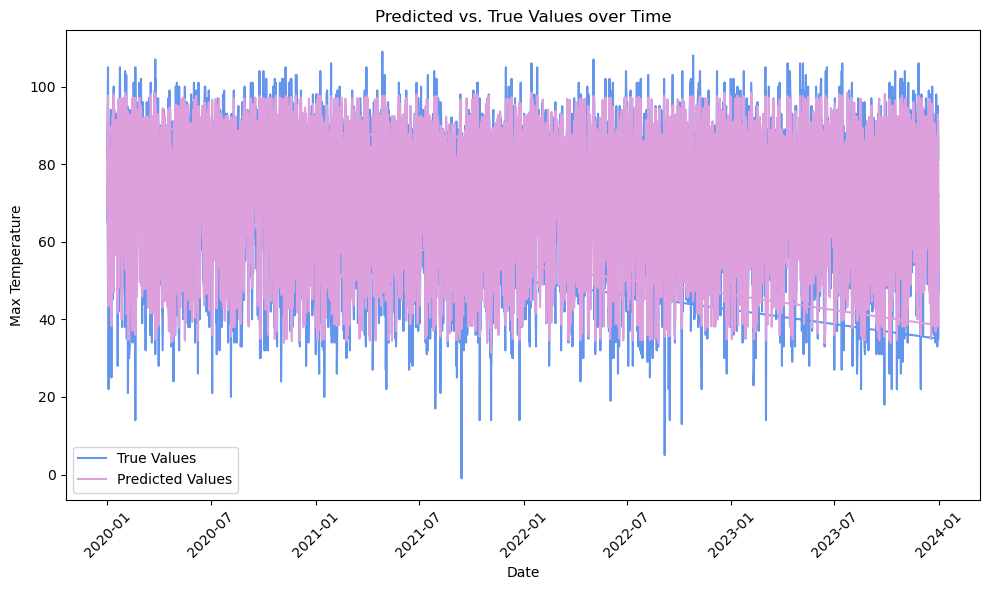

In [254]:
import matplotlib.pyplot as plt

# Assuming y_train_pred, y_test_pred, y_train, y_test are available

# Concatenate train and test sets
y_pred = np.concatenate([y_train_pred, y_test_pred])
y_true = np.concatenate([y_train, y_test])

# Assuming you have a DataFrame df with a date/time column 'Date'
# Extract the date/time column as a pandas Series
dates = df['Date']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, y_true, label='True Values', color='cornflowerblue')
plt.plot(dates, y_pred, label='Predicted Values', color='plum')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Predicted vs. True Values over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


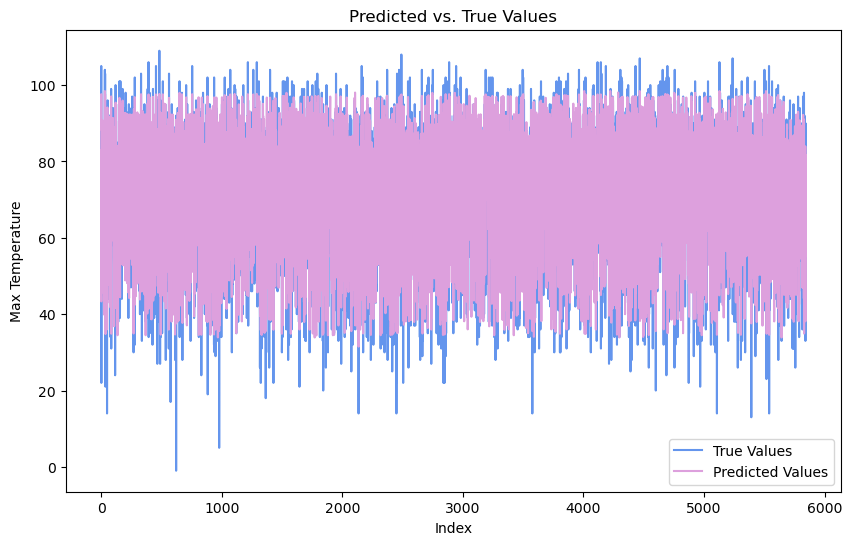

In [208]:
import matplotlib.pyplot as plt

# Assuming y_train_pred, y_test_pred, y_train, y_test are available

# Concatenate train and test sets
y_pred = np.concatenate([y_train_pred, y_test_pred])
y_true = np.concatenate([y_train, y_test])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_true)), y_true, label='True Values', color='cornflowerblue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', color='plum')
plt.xlabel('Index')
plt.ylabel('Max Temperature')
plt.title('Predicted vs. True Values')
plt.legend()
plt.show()


In [255]:
# true_temperatures = pd.DataFrame({'Date': x_test['Year'].astype(str) + '-' + x_test['Month'].astype(str) + '-' + x_test['Day'].astype(str)})
# true_temperatures['Date'] = pd.to_datetime(true_temperatures['Date'], format='%Y-%m-%d')
# true_temperatures['True_Max_Temp'] = y_test.values


# # Predict max temperatures for each city
# predicted_temperatures_df = pd.DataFrame({'Date': true_temperatures['Date']})
# for city in cities:
#     predicted_temp_city = []
#     for _, row in true_temperatures.iterrows():
#         example_features_city = example_features.copy()
#         example_features_city.loc[:, cities] = 0  # Reset all city columns to 0
#         example_features_city.loc[:, city] = 1   # Set the current city to 1
#         predicted_temp = model.predict(example_features_city.iloc[[0]]).round()  # Predict temperature for the current row
#         predicted_temp_city.append(predicted_temp[0])  # Append the predicted temperature to the list
#     predicted_temperatures_df[city] = predicted_temp_city


In [256]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Define Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Grid search to find the best hyperparameters
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_



In [259]:
# Train the best model
best_model.fit(x_train, y_train)

# Make predictions
y_train_pred_best = best_model.predict(x_train)
y_test_pred_best = best_model.predict(x_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred_best)
test_mse = mean_squared_error(y_test, y_test_pred_best)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training MSE: 27.65141208144527
Testing MSE: 43.401885396681074
Training RMSE: 5.258460999327205
Testing RMSE: 6.58801073137264


In [258]:
# Get the best model parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best Model: GradientBoostingRegressor(max_depth=5, min_samples_split=3, n_estimators=200)


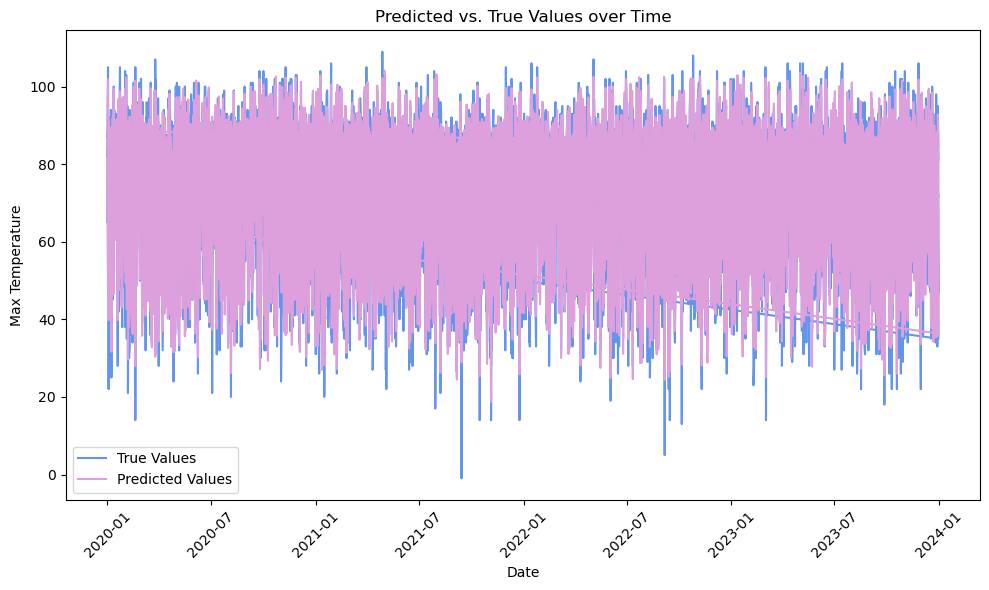

In [261]:
import matplotlib.pyplot as plt

# Assuming y_train_pred, y_test_pred, y_train, y_test are available

# Concatenate train and test sets
y_pred_best = np.concatenate([y_train_pred_best, y_test_pred_best])
y_true = np.concatenate([y_train, y_test])

# Assuming you have a DataFrame df with a date/time column 'Date'
# Extract the date/time column as a pandas Series
dates = df['Date']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates[:len(y_true)], y_true, label='True Values', color='cornflowerblue')
plt.plot(dates[:len(y_pred)], y_pred_best, label='Predicted Values', color='plum')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Predicted vs. True Values over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


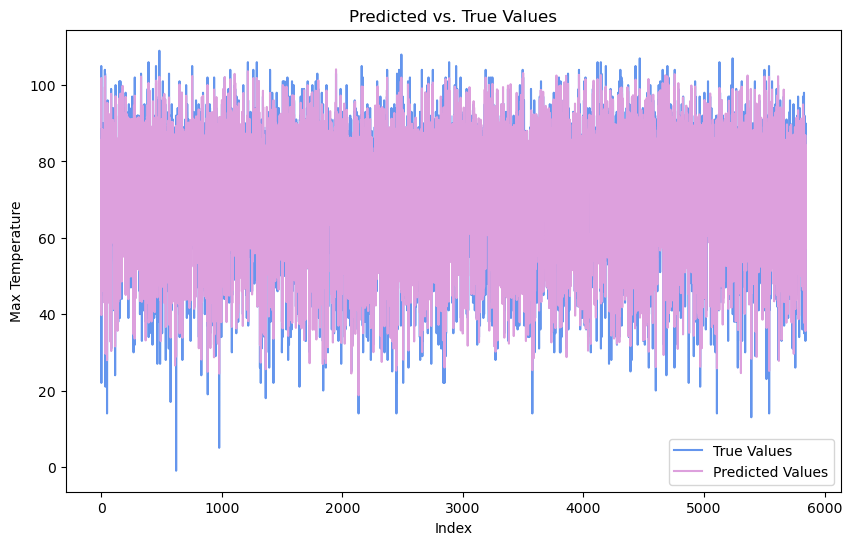

In [265]:
import matplotlib.pyplot as plt

# Assuming y_train_pred, y_test_pred, y_train, y_test are available

# Concatenate train and test sets
y_pred_best = np.concatenate([y_train_pred_best, y_test_pred_best])
y_true = np.concatenate([y_train, y_test])

# Plotting as a line graph
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='True Values', color='cornflowerblue')
plt.plot(y_pred_best, label='Predicted Values', color='plum')
plt.xlabel('Index')
plt.ylabel('Max Temperature')
plt.title('Predicted vs. True Values')
plt.legend()
plt.show()



In [241]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define a pipeline with feature scaling and Ridge Regression
model = make_pipeline(StandardScaler(), RidgeCV(alphas=[0.1, 1.0, 10.0]))

# Fit the model
model.fit(x_train, y_train)

# Predict and evaluate
y_train_pred = model.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = sqrt(mse_train)

y_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)

# Print evaluation metrics
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)


Train RMSE: 13.94479171566264
Test RMSE: 14.00059093450391


In [242]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the Ridge Regression model with standardization
model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))  # You can adjust the alpha value as needed

# Define the number of folds for k-fold cross-validation
num_folds = 5  # You can adjust the number of folds as needed

# Perform k-fold cross-validation and compute RMSE for each fold
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
rmse_scores = cross_val_score(model, features, target, cv=kfold, scoring='neg_root_mean_squared_error')

# Convert negative RMSE scores to positive
rmse_scores = -rmse_scores

# Print RMSE scores for each fold
print("RMSE scores for each fold:", rmse_scores)

# Calculate and print the mean and standard deviation of RMSE scores
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()
print("Mean RMSE:", mean_rmse)
print("Standard deviation of RMSE:", std_rmse)


RMSE scores for each fold: [14.00112997 14.06096464 14.53590623 13.47814297 13.83116787]
Mean RMSE: 13.981462336306222
Standard deviation of RMSE: 0.34352126037908604


In [164]:
# Get city/feature names as list
feature_names = features.columns
feature_names

Index(['Year', 'Month', 'Day', 'City_Austin', 'City_Chicago', 'City_Miami',
       'City_NYC'],
      dtype='object')

In [165]:
import numpy as np
import pandas as pd

# Create example feature data frame and index by column names
example_features = pd.DataFrame({
    'Year': [2024],
    'Month': [4],
    'Day': [3],
    'City_Austin': [0],
    'City_NYC': [0],
    'City_Chicago': [0],
    'City_Miami': [1]
})
example_features = example_features.reindex(columns=feature_names)

if example_features.isna().any().any():
    print("There are NaN values present in example_features.")
else:
    print("There are no NaN values present in example_features.")

# Predict max temp and print output
predicted_temp = model.predict(example_features)
print(f"Predicted Maximum Temperature: {predicted_temp[0]}")

There are no NaN values present in example_features.
Predicted Maximum Temperature: 83.8171758724604


In [166]:
# Create example feature data frame and index by column names
example_features = pd.DataFrame({
    'Year': [2024],
    'Month': [4],
    'Day': [3],
    'City_Austin': [1],
    'City_NYC': [0],
    'City_Chicago': [0],
    'City_Miami': [0]
})
example_features = example_features.reindex(columns=feature_names)

if example_features.isna().any().any():
    print("There are NaN values present in example_features.")
else:
    print("There are no NaN values present in example_features.")

# Predict max temp and print output
predicted_temp = model.predict(example_features)
print(f"Predicted Maximum Temperature: {predicted_temp[0]}")

There are no NaN values present in example_features.
Predicted Maximum Temperature: 78.86675767708385


In [167]:
# Create example feature data frame and index by column names
example_features = pd.DataFrame({
    'Year': [2024],
    'Month': [4],
    'Day': [3],
    'City_Austin': [0],
    'City_NYC': [1],
    'City_Chicago': [0],
    'City_Miami': [0]
})
example_features = example_features.reindex(columns=feature_names)

if example_features.isna().any().any():
    print("There are NaN values present in example_features.")
else:
    print("There are no NaN values present in example_features.")

# Predict max temp and print output
predicted_temp = model.predict(example_features)
print(f"Predicted Maximum Temperature: {predicted_temp[0]}")

There are no NaN values present in example_features.
Predicted Maximum Temperature: 58.02843252870829


In [168]:
# Create example feature data frame and index by column names
example_features = pd.DataFrame({
    'Year': [2024],
    'Month': [4],
    'Day': [3],
    'City_Austin': [0],
    'City_NYC': [0],
    'City_Chicago': [1],
    'City_Miami': [0]
})
example_features = example_features.reindex(columns=feature_names)

if example_features.isna().any().any():
    print("There are NaN values present in example_features.")
else:
    print("There are no NaN values present in example_features.")

# Predict max temp and print output
predicted_temp = model.predict(example_features)
print(f"Predicted Maximum Temperature: {predicted_temp[0]}")

There are no NaN values present in example_features.
Predicted Maximum Temperature: 55.60417259148401


In [209]:
cities = ['City_Austin', 'City_NYC', 'City_Chicago', 'City_Miami']
predicted_temperatures = {}

# Get feature names used during training
feature_names = model.feature_names_in_

for city in cities:
    example_features = pd.DataFrame({
        'Year': [2024],
        'Month': [4],
        'Day': [3],
        'City_Austin': [0],
        'City_NYC': [0],
        'City_Chicago': [1],
        'City_Miami': [0]
    })

    # Reorder columns to match feature names used during training
    example_features = example_features.reindex(columns=feature_names, fill_value=0)

    example_features[city] = 1
    predicted_temp = model.predict(example_features).round()
    predicted_temperatures[city] = predicted_temp[0]

print(f"Predicted max temps: {predicted_temperatures}")


Predicted max temps: {'City_Austin': 67.0, 'City_NYC': 56.0, 'City_Chicago': 56.0, 'City_Miami': 72.0}


## Kalshi API and Automatic Voting

In [171]:
import kalshi_python
import time
import json
import uuid
import uuid
from kalshi_python.models import *
from pprint import pprint

config = kalshi_python.Configuration()
# Comment the line below to use production
config.host = 'https://demo-api.kalshi.co/trade-api/v2'
kalshi_api = kalshi_python.ApiInstance(
    email="astoicad@bu.edu",
    password="*****", #Password has been removed for privacy reasons
    configuration=config,
)
exchangeStatus = kalshi_api.get_exchange_status()
print('Exchange status response: ')
pprint(exchangeStatus)

Exchange status response: 
{'exchange_active': True, 'trading_active': True}


In [172]:
city_tickers = {
    'City_Austin' : 'HIGHAUS',
    'City_NYC' : 'HIGHNY',
    'City_Chicago' : 'HIGHCHI',
    'City_Miami' : 'HIGHMIA'}
import datetime 
current_date=datetime.datetime.now().strftime('%y%b%d').upper()
current_date

'24APR03'

In [173]:
event_tickers = {}
for city, predicted_temp in predicted_temperatures.items():
    event_tickers[city] = f"{city_tickers[city]}-{current_date}"
event_tickers

{'City_Austin': 'HIGHAUS-24APR03',
 'City_NYC': 'HIGHNY-24APR03',
 'City_Chicago': 'HIGHCHI-24APR03',
 'City_Miami': 'HIGHMIA-24APR03'}

In [174]:
city_options = {}
for city, event_ticker in event_tickers.items():
    try:
        eventResponse = kalshi_api.get_event(event_ticker)
        market_options = [{'subtitle':market.subtitle, 'ticker':market.ticker} for market in eventResponse.markets]
        city_options[city] = market_options
    except Exception as e:
        print(f"Error fetching market options for {city} ({event_ticker}):{e}")

for city, options in city_options.items():
    print(f"{city}: {options}")

City_Austin: [{'subtitle': '71° or below', 'ticker': 'HIGHAUS-24APR03-T72'}, {'subtitle': '72° to 73°', 'ticker': 'HIGHAUS-24APR03-B72.5'}, {'subtitle': '74° to 75°', 'ticker': 'HIGHAUS-24APR03-B74.5'}, {'subtitle': '76° to 77°', 'ticker': 'HIGHAUS-24APR03-B76.5'}, {'subtitle': '78° to 79°', 'ticker': 'HIGHAUS-24APR03-B78.5'}, {'subtitle': '80° or above', 'ticker': 'HIGHAUS-24APR03-T79'}]
City_NYC: [{'subtitle': '43° or below', 'ticker': 'HIGHNY-24APR03-T44'}, {'subtitle': '44° to 45°', 'ticker': 'HIGHNY-24APR03-B44.5'}, {'subtitle': '46° to 47°', 'ticker': 'HIGHNY-24APR03-B46.5'}, {'subtitle': '48° to 49°', 'ticker': 'HIGHNY-24APR03-B48.5'}, {'subtitle': '50° to 51°', 'ticker': 'HIGHNY-24APR03-B50.5'}, {'subtitle': '52° or above', 'ticker': 'HIGHNY-24APR03-T51'}]
City_Chicago: [{'subtitle': '34° or below', 'ticker': 'HIGHCHI-24APR03-T35'}, {'subtitle': '35° to 36°', 'ticker': 'HIGHCHI-24APR03-B35.5'}, {'subtitle': '37° to 38°', 'ticker': 'HIGHCHI-24APR03-B37.5'}, {'subtitle': '39° to 

In [ ]:
city_options

In [176]:
predicted_temperatures

{'City_Austin': 67.0,
 'City_NYC': 56.0,
 'City_Chicago': 56.0,
 'City_Miami': 72.0}

In [186]:
import re

def vote(predicted_temp, market_options):
    closest_option = None
    closest_temp_diff = float('inf')

    for option in market_options:
        subtitle = option['subtitle']
        temps = re.findall(r'\d+', subtitle)
        
        if len(temps) == 1:
            temp = int(temps[0])
            temp_diff = abs(predicted_temp - temp)
            if temp_diff < closest_temp_diff:
                closest_temp_diff = temp_diff
                closest_option = option
        
        elif len(temps) == 2:
            range_min, range_max = map(int, temps)
            if range_min <= predicted_temp <= range_max:
                return option
            else:
                # Calculate the difference between predicted_temp and the range boundary closest to it
                if abs(predicted_temp - range_min) < abs(predicted_temp - range_max):
                    closest_temp = range_min
                else:
                    closest_temp = range_max
                
                temp_diff = abs(predicted_temp - closest_temp)
                if temp_diff < closest_temp_diff:
                    closest_temp_diff = temp_diff
                    closest_option = option
    
    return closest_option


In [187]:
market_options = city_options.get('City_NYC',[])
closest_option = vote(predicted_temp, market_options)
closest_option

{'subtitle': '52° or above', 'ticker': 'HIGHNY-24APR03-T51'}

In [ ]:
for city, predicted_temp in predicted_temperatures.items():
    market_options = city_options.get(city, [])
    closest_option = vote(predicted_temp, market_options)

    if closest_option:
        ticker = closest_option['ticker']
        print(f"Attempting to place order for {city} with ticker {ticker} based on predicted temperature of {predicted_temp}")

        orderUuid = str(uuid.uuid4())
        
        try:    
            orderResponse = kalshi_api.create_order(CreateOrderRequest(
                ticker=ticker,
                action='buy',
                type='limit',
                yes_price=99,
                count=10,
                client_order_id=orderUuid,
                side='yes',
            ))
            print(f"\nOrder submitted for {city} with ticker {ticker}: {orderResponse}")
            pprint(orderResponse)
        except Exception as e:
            print(f"\nOrder not submitted for {city} with ticker {ticker}: {str(e)}")
    else:
        print(f"No suitable market option found for {city} with predicted temperature of {predicted_temp}")